In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('2008_swing_states.csv')
df.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


### Optimal parameters
Parameter values that brings the model in closet agreement with the data

### Linear regression by least squares
선형회귀의 매개변수는 기울기와 절편이 있다. 기울기는 선이 얼마나 가파른지를 설정, 절편은 선이 y축과 교차하는 위치를 설정   

**어떤 기울기와 절편이 데이터를 가장 잘 설명하는지 알 수 있을까?**  
데이터 포인트가 집합적으로 선에 최대한 가깝게 설정  
데이터 포인트와 선 사이의 수직거리를 잔여(residuals) 

Least squares(최소자승법) 
The process of finding the parameters for which the sum of the squares of the residuals is minimal  
최소자승을 구하기 위해 np.polyfit() 사용, 선형함수가 1차 다항식이기 때문에 사용 가능 

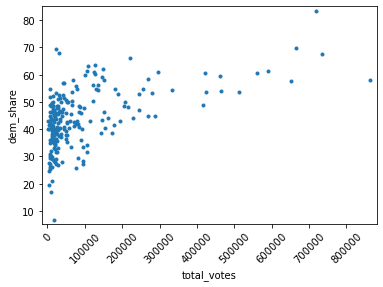

In [3]:
_ = plt.plot(df['total_votes'], df['dem_share'], marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('total_votes')
_ = plt.ylabel('dem_share')
_ = plt.xticks(rotation =  45)

In [4]:
slope , intercept = np.polyfit(df['total_votes'] , df['dem_share'] , 1)

In [5]:
slope

4.037071700946557e-05

In [6]:
intercept

40.11391196864175

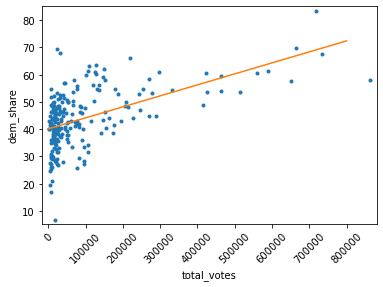

In [7]:
_ = plt.plot(df['total_votes'], df['dem_share'], marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('total_votes')
_ = plt.ylabel('dem_share')
_ = plt.xticks(rotation =  45)

x = np.array([0,800000])
y = slope * x + intercept

_ = plt.plot(x,y)

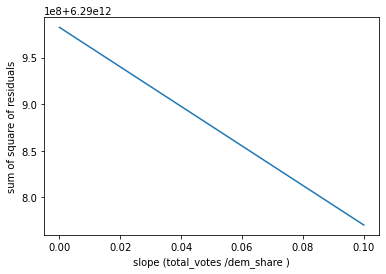

In [8]:
# the sum of the squares of the residuals , RSS

a_vals = np.linspace(0, 0.1,100)
rss = np.empty_like(a_vals) # 함수는 (값의 초기화를 수행하지 않고) 주어진 어레이의 형태와 타입을 갖는 새로운 어레이를 반환

for i ,a in enumerate(a_vals) :
    rss[i] = np.sum((df['total_votes'] - a*df['dem_share'] + intercept) **2)
    
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (total_votes /dem_share )')
plt.ylabel('sum of square of residuals')
plt.show()

### The importance of EDA: Anscombe's quartet
회귀 매개변수를 학습하고 과정 후 매개변수 추정치에 대한 불확실성을 정량화하여 신뢰구간 구성 

In [9]:
aq = pd.read_csv('anscombe.csv')
aq.head()

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47


In [10]:
a ,b  =  np.polyfit(aq['x1'] ,aq['y1']  , 1)
print(a ,b)

0.5000909090909095 3.0000909090909076


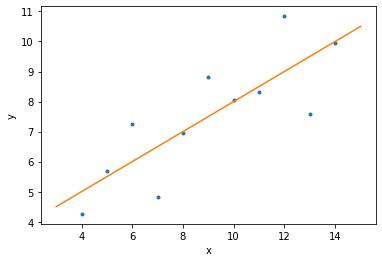

In [11]:
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

_ = plt.plot(aq['x1'], aq['y1'], marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [12]:
anscombe_x = [aq['x1'], aq['x2'], aq['x3'], aq['x4']]
anscombe_y = [aq['y1'], aq['y2'], aq['y3'], aq['y4']]

In [13]:
for x, y in zip(anscombe_x,  anscombe_y):
    a, b = np.polyfit( x, y , 1 )
    
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909095 intercept: 3.0000909090909076
slope: 0.5000000000000004 intercept: 3.000909090909089
slope: 0.4997272727272731 intercept: 3.0024545454545453
slope: 0.49990909090909064 intercept: 3.0017272727272735


### Bootstrap confidence intervals

Bootstraping: The use of resampled data to perform statistical inference  
Bootstrap Sample : A resampled array of the data  
Bootstrap Replicate : A statistic computed from a resampled array  

통계적 추론을 위해 리샘플된 데이터를 사용   
리샘플된 데이터 배열을 Bootstrap(부트스트램)    
Bootstrap replicate는 Bootstrap 샘플에서 계산된 요약 통계 값   

In [14]:
# resampling 

np.random.choice([1,2,3,4,5] ,size = 5) #size를 통해 배열에서 얼마나 많은 샘플을 추출할 것인지 지정 

array([3, 4, 3, 5, 2])

In [15]:
rainfall=np.asarray([ 875.5,  648.2,  788.1,  940.3,  491.1,  743.5,  730.1,  686.5,
        878.8,  865.6,  654.9,  831.5,  798.1,  681.8,  743.8,  689.1,
        752.1,  837.2,  710.6,  749.2,  967.1,  701.2,  619. ,  747.6,
        803.4,  645.6,  804.1,  787.4,  646.8,  997.1,  774. ,  734.5,
        835. ,  840.7,  659.6,  828.3,  909.7,  856.9,  578.3,  904.2,
        883.9,  740.1,  773.9,  741.4,  866.8,  871.1,  712.5,  919.2,
        927.9,  809.4,  633.8,  626.8,  871.3,  774.3,  898.8,  789.6,
        936.3,  765.4,  882.1,  681.1,  661.3,  847.9,  683.9,  985.7,
        771.1,  736.6,  713.2,  774.5,  937.7,  694.5,  598.2,  983.8,
        700.2,  901.3,  733.5,  964.4,  609.3, 1035.2,  718. ,  688.6,
        736.8,  643.3, 1038.5,  969. ,  802.7,  876.6,  944.7,  786.6,
        770.4,  808.6,  761.3,  774.2,  559.3,  674.2,  883.6,  823.9,
        960.4,  877.8,  940.6,  831.8,  906.2,  866.5,  674.1,  998.1,
        789.3,  915. ,  737.1,  763. ,  666.7,  824.5,  913.8,  905.1,
        667.8,  747.4,  784.7,  925.4,  880.2, 1086.9,  764.4, 1050.1,
        595.2,  855.2,  726.9,  785.2,  948.8,  970.6,  896. ,  618.4,
        572.4, 1146.4,  728.2,  864.2,  793. ])

In [16]:
# ECDF 생성 함수 
def ecdf(data):
    
    n=len(data)
    x=np.sort(data)
    y = np.arange(1,n+1) / n
    return x, y

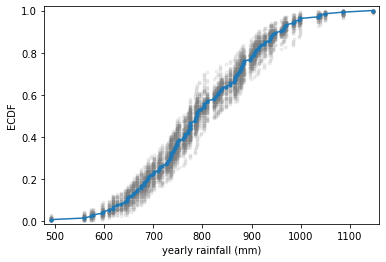

In [17]:
for _ in range(50):
    bs_sample = np.random.choice(rainfall, size=len(rainfall))
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                color='gray', alpha=0.1)

x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

In [18]:
# Bootstrap replicate fuction 생성

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):

    bs_replicates = np.empty(size)

    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [19]:
bootstrap_replicate_1d(rainfall , np.mean)

803.672932330827

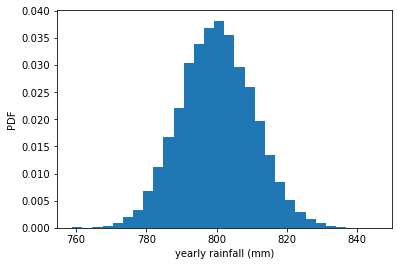

In [20]:
bs_replicates = draw_bs_reps(rainfall,func=np.mean,size=10000)

_ = plt.hist(bs_replicates , bins = 30 ,density=True)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('PDF')
plt.show()

10.510549150506188
10.41649261122761


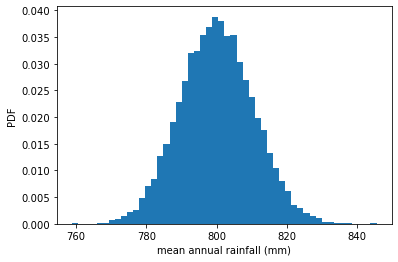

In [21]:
# sem은 뽑아낸 표본 데이터의 값이 알고자 하는 모수의 값을 얼마나 잘 추정하는지를 설명하는 추론 통계
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

bs_std = np.std(bs_replicates)
print(bs_std)

_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')


plt.show()

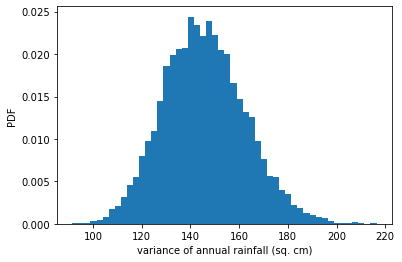

In [22]:
bs_replicates = draw_bs_reps(rainfall,np.var,size=10000)

bs_replicates=bs_replicates/100

_ = plt.hist(bs_replicates, bins=50, density= True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')
plt.show()

 #### Confidence interval of a static - 지속해서 측정을 반복하면 관찰된 값의 p%가 p% 신뢰구간 내에 있게 된다. 신뢰구간 95%에 든다는 것은 표본평균의 95%는 95% 신뢰구간내에 있다는 의미

In [23]:
conf_int = np.percentile(bs_replicates , [2.5 , 97.5])
conf_int

array([114.62844238, 180.32524927])

#### Pairs bootstrap 
쌍을 이루어 데이터를 리셈플 

비모수추정  
데이터의 기초가 되는 어떤 모델도 가정하지 않았음을 의미, 추정은 데이터만을 사용하여 수행됨

In [24]:
# 선거 데이터 사용 
# 똑같은 조건에서 다시 선거를 치른다면? 기울기와 절편은 어떻게 변할까

inds = np.arange(len(df['total_votes']))
bs_inds = np.random.choice(inds , len(inds))

# bootstrap sample은 원본데이터 배열에서 각 값을 잘라서 생성 
bs_tot_votes = df['total_votes'][bs_inds]
bs_dem_share = df['dem_share'][bs_inds]

In [25]:
bs_slope , bs_intercept   = np.polyfit(bs_tot_votes , bs_dem_share ,1)
bs_slope , bs_intercept

(3.929133981257356e-05, 40.301425935969235)

In [26]:
# bootstrap 한 값과 상이
np.polyfit(df['total_votes'] , df['dem_share'] , 1)

array([4.0370717e-05, 4.0113912e+01])

In [27]:
def draw_bs_pairs_linreg(x, y, size=1):
    
    inds = np.arange(len(x))
    
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

[3.24817426e-05 4.90901543e-05]


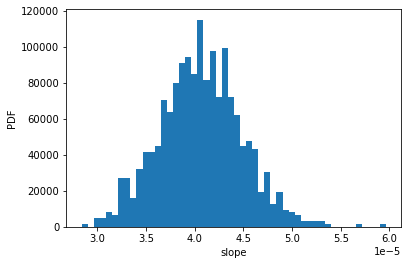

In [28]:
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(df['total_votes'],df['dem_share'],size=1000)

print(np.percentile(bs_slope_reps, [2.5,97.5]))

_ = plt.hist(bs_slope_reps, bins=50,density= True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

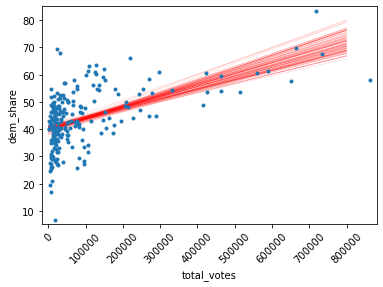

In [29]:
x = np.array([0, 800000])

for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

_ = plt.plot(df['total_votes'],df['dem_share'], marker='.', linestyle='none')

_ = plt.xlabel('total_votes')
_ = plt.ylabel('dem_share')
_ = plt.xticks(rotation = 45)
plt.margins(0.02)
plt.show()

### Hypothesis test
관찰된 데이터가 실제로 모델에 의해 설명되는 것이 얼마나 합리적인지 평가하는 방법은 가설 테스트의 영역  

가설이 참이라고 가정하고 데이터가 합리적인지 평가  
귀무가설(Null hypothesis) -  모집단의 특성에 대해 옳다고 제한하는 잠정적인 주장   
대립가설( alternative hypothesis) - 귀무가설이 거짓이라면 대안적으로 참이 되는 가설 

#### 순열 (Permutation) 
서로 다른 n개의 원소에서 r개를 중복없이 순서에 상관있게 선택하는 혹은 나열하는 것

In [30]:
df_PA = df[df['dem_share'] =='PA']
df_OH = df[df['dem_share'] =='OH']

In [31]:
# np.concatenate는 연결할려는 배열의 튜플을 인수로 취한다.
dem_share_both  = np.concatenate((df_PA['dem_share'] , df_OH['dem_share']))

In [32]:
dem_share_perm  = np.random.permutation(dem_share_both)
perm_sample_PA = dem_share_perm[: len(df_PA['dem_share'])]
perm_sample_OH = dem_share_perm[len(df_OH['dem_share']):]

In [33]:
# 함수생성 

def permutation (data1, data2) :
    data = np.concatenate((df_PA['dem_share'] , df_OH['dem_share']))
    permuted_data =  np.random.permutation(data)
    perm_sample_1 = permuted_data[: len(df_PA['dem_share'])]
    perm_sample_2 = permuted_data[len(df_OH['dem_share']) :]
    
    return perm_sample_1, perm_sample_2